In [1]:
import sklearn.datasets as datasets

In [2]:
import pandas as pd

In [3]:
iris = datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
dtree=DecisionTreeClassifier()
dtree.fit(df,y)
yhat = dtree.predict(df)
print(y-yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [7]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
dtree.tree_

In [9]:
from sklearn.externals.six import StringIO

In [11]:
from IPython.display import Image

In [12]:
from sklearn.tree import export_graphviz
export_graphviz

In [14]:
import pydotplus

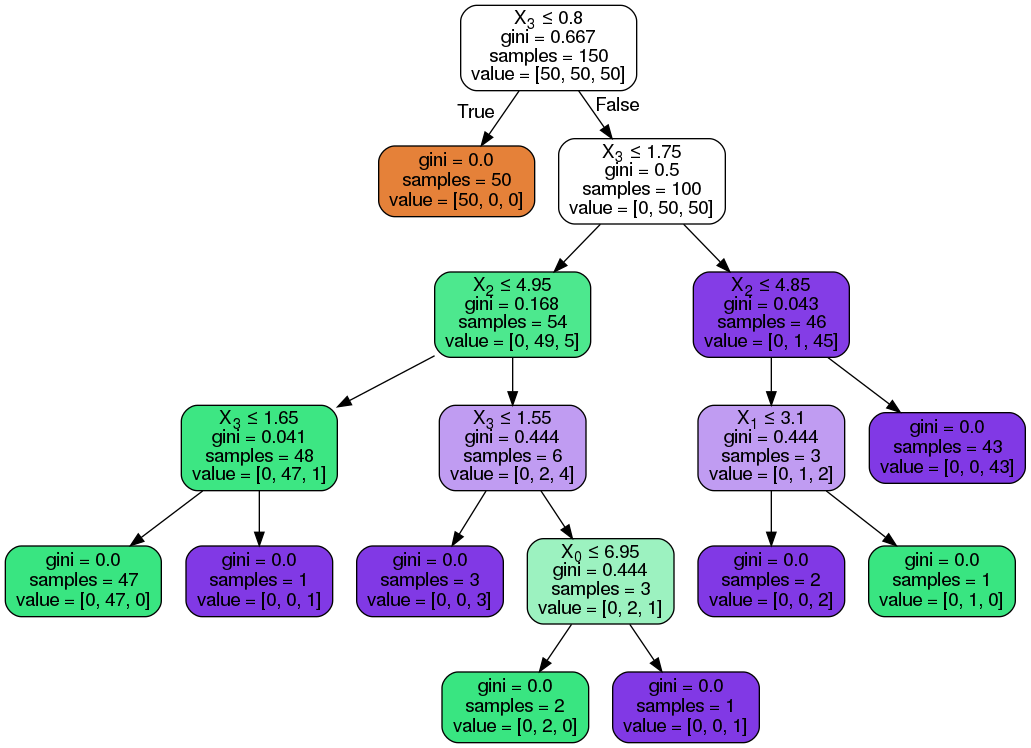

In [17]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data, filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

* gini = try to make gini zero to reduce the variance
* gini = metric of impurity


In [18]:
dtree.feature_importances_

array([0.01333333, 0.01333333, 0.05072262, 0.92261071])

feature_importances_ method is great for feature explainability

# Bagging
* bootstrapping and aggregating (B-Agg-ing)

* an ensemble is better than any individual model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.35, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [22]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [23]:
estimator = forest.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [24]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [26]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [28]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [29]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [34]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [32]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df, cancer.target, stratify=cancer.target, random_state=42)

In [36]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [38]:
y_hat = forest.predict(X_test)

In [43]:
results = y_test - y_hat

In [40]:
forest.score(X_test, y_test)

0.958041958041958

In [41]:
results = (y_test == y_hat)

In [44]:
results.shape

(143,)

In [45]:
results = pd.DataFrame(results)

In [47]:
results.loc[]

,0
0,0
1,0
2,0
3,0
4,-1
5,0
6,0
7,0
8,0
9,0


In [60]:
false_negatives= ((y_test - y_hat)== -1)
import numpy as np

In [53]:
forest.feature_importances_

array([0.01573926, 0.01565104, 0.00203568, 0.10677515, 0.00583498,
       0.00250098, 0.00279083, 0.1518233 , 0.00170642, 0.        ,
       0.00408493, 0.00285406, 0.00165178, 0.00553254, 0.        ,
       0.01549629, 0.00621975, 0.        , 0.00340706, 0.00362224,
       0.32952352, 0.04192876, 0.02694543, 0.03620429, 0.02041974,
       0.00820242, 0.01165303, 0.15871316, 0.01608264, 0.00260073])

In [63]:
np.unique(false_negatives,return_counts=True)

(array([False,  True]), array([139,   4]))

In [54]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
dict(zip(forest.feature_importances_, cancer.feature_names))

{0.015739262928051473: 'mean radius',
 0.015651044672945837: 'mean texture',
 0.0020356801529149426: 'mean perimeter',
 0.10677515223691478: 'mean area',
 0.005834982547915829: 'mean smoothness',
 0.002500978473581213: 'mean compactness',
 0.002790830007110725: 'mean concavity',
 0.15182329831380897: 'mean concave points',
 0.0017064182384178722: 'mean symmetry',
 0.0: 'concave points error',
 0.004084931506849317: 'radius error',
 0.002854055217267032: 'texture error',
 0.0016517796663420015: 'perimeter error',
 0.005532537025553305: 'area error',
 0.015496286615545501: 'compactness error',
 0.006219747330007434: 'concavity error',
 0.003407057380791313: 'symmetry error',
 0.003622238174920652: 'fractal dimension error',
 0.32952352100731974: 'worst radius',
 0.041928756646038595: 'worst texture',
 0.026945434556497033: 'worst perimeter',
 0.036204286652637835: 'worst area',
 0.020419743390858346: 'worst smoothness',
 0.008202424773778534: 'worst compactness',
 0.0116530272939191: 'wo

In [58]:
dict(zip(cancer.feature_names, forest.feature_importances_))

{'mean radius': 0.015739262928051473,
 'mean texture': 0.015651044672945837,
 'mean perimeter': 0.0020356801529149426,
 'mean area': 0.10677515223691478,
 'mean smoothness': 0.005834982547915829,
 'mean compactness': 0.002500978473581213,
 'mean concavity': 0.002790830007110725,
 'mean concave points': 0.15182329831380897,
 'mean symmetry': 0.0017064182384178722,
 'mean fractal dimension': 0.0,
 'radius error': 0.004084931506849317,
 'texture error': 0.002854055217267032,
 'perimeter error': 0.0016517796663420015,
 'area error': 0.005532537025553305,
 'smoothness error': 0.0,
 'compactness error': 0.015496286615545501,
 'concavity error': 0.006219747330007434,
 'concave points error': 0.0,
 'symmetry error': 0.003407057380791313,
 'fractal dimension error': 0.003622238174920652,
 'worst radius': 0.32952352100731974,
 'worst texture': 0.041928756646038595,
 'worst perimeter': 0.026945434556497033,
 'worst area': 0.036204286652637835,
 'worst smoothness': 0.020419743390858346,
 'worst co

In [65]:
print("False positives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==-1)))
print("False negatives: " + str(sum(pd.DataFrame(y_test - y_hat)[0]==1)))
print("Accuracy: " + str(round(forest.score(X_test, y_test), 2)*100) + "%")

False positives: 4
False negatives: 2
Accuracy: 96.0%


In [66]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
yhat = dtree.predict(X_test)

In [69]:
print("False positives: " + str(sum(pd.DataFrame(y_test - yhat)[0]==-1)))
print("False negatives: " + str(sum(pd.DataFrame(y_test - yhat)[0]==1)))
print("Accuracy: " + str(round(dtree.score(X_test, y_test), 2)*100) + "%")

False positives: 5
False negatives: 7
Accuracy: 92.0%


In [70]:
dict(zip(dtree.feature_importances_, cancer.feature_names))

{0.0: 'worst fractal dimension',
 0.013546745813016743: 'mean smoothness',
 0.006689751018773701: 'mean concavity',
 0.0023113533796596947: 'radius error',
 0.046309693106726335: 'texture error',
 0.0023874473180847573: 'smoothness error',
 0.009757314709226457: 'symmetry error',
 0.007525969896120415: 'fractal dimension error',
 0.7029891880432477: 'worst radius',
 0.041790554579894126: 'worst texture',
 0.0090311638753445: 'worst area',
 0.017403118708693075: 'worst concavity',
 0.11684357098550441: 'worst concave points',
 0.023414128565707962: 'worst symmetry'}

In [71]:
dtree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01354675,
       0.        , 0.00668975, 0.        , 0.        , 0.        ,
       0.00231135, 0.04630969, 0.        , 0.        , 0.00238745,
       0.        , 0.        , 0.        , 0.00975731, 0.00752597,
       0.70298919, 0.04179055, 0.        , 0.00903116, 0.        ,
       0.        , 0.01740312, 0.11684357, 0.02341413, 0.        ])

In [72]:
y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]

NameError: name 'x' is not defined

In [78]:
y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]

IndexError: too many indices for array

In [97]:
x = np.random.random_sample(size=(100,10))

In [98]:
x.shape

(100, 10)

In [91]:
x

array([[9.55054279e-01, 9.00577424e-01, 4.82827559e-01, 7.59532238e-01,
        4.83911550e-01, 3.54391186e-01, 1.08011280e-01, 8.98854477e-01,
        4.54338383e-01, 1.51521006e-01],
       [4.99087493e-01, 4.25463721e-03, 8.96587919e-01, 8.28257338e-01,
        4.30191156e-01, 4.17008022e-02, 5.72626761e-01, 8.15877988e-01,
        6.05398757e-02, 8.17529145e-01],
       [4.23614491e-02, 3.25006360e-01, 2.64274385e-01, 7.21051706e-01,
        8.86241012e-01, 4.89747159e-01, 7.58112405e-01, 4.68894389e-02,
        5.40471060e-01, 9.00912192e-01],
       [7.16579429e-01, 4.68569728e-02, 1.91638853e-01, 8.89005863e-01,
        6.90415811e-01, 1.15463884e-03, 6.31221936e-01, 2.65193257e-01,
        9.03600904e-01, 9.11819751e-01],
       [1.64499054e-01, 5.44566373e-01, 3.23153863e-01, 9.13424095e-01,
        5.71420589e-02, 6.13942853e-01, 1.68835223e-02, 6.05403225e-01,
        3.70435827e-01, 6.33459021e-01],
       [7.36194650e-02, 8.98057623e-01, 9.81338216e-01, 2.19925383e-01,
   

In [83]:
y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]

In [84]:
y

array([2.18796472, 1.94350189, 3.04094439, 3.20851769, 3.61454592,
       3.26822751, 3.42403566, 3.09989145, 3.34411639, 2.63125044])

In [92]:
train_test_split?

In [162]:
def gen_data(n):

    x= 0.75* np.random.rand(n,10)
    y = x[:,0]*np.sin(x[:,0]) + np.sin(2*x[:,1]) + 3*x[:,2] + .4*x[:,3] + x[:,4]
    return train_test_split(x,y, train_size = 0.5, test_size=0.5)
        

In [163]:
x_train, x_test, y_train, y_test = gen_data(100)

In [164]:
y_test

array([3.48012969, 3.16045501, 3.34370853, 1.75624067, 2.61052044,
       1.71431084, 1.74220682, 3.22180577, 2.96824987, 2.71917185,
       1.42429098, 3.86939644, 1.78763933, 2.66294699, 2.73406793,
       2.80826853, 2.50466174, 2.83065754, 3.45750478, 1.84530385,
       2.67598826, 3.15674442, 2.32489544, 1.51621389, 3.77080875,
       3.04325314, 1.65876281, 2.94224214, 1.85704213, 2.57586768,
       3.2813779 , 2.67533059, 2.77480468, 1.76255605, 3.43944087,
       2.92388042, 2.5791964 , 2.88481916, 2.33405372, 2.69829507,
       1.34443963, 2.50274319, 3.19456418, 2.9627118 , 2.04894738,
       2.92980152, 2.43592407, 3.2287642 , 3.4354468 , 3.33598063])

In [165]:
x_train.shape

(50, 10)

In [166]:
x_test.shape

(50, 10)

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
x_train, x_test, y_train, y_test = gen_data(100)

In [179]:
forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [180]:
y_hat = forest.predict(x_test)

In [181]:
results = y_test - y_hat

In [182]:
results

array([-0.39631929,  0.60237426,  0.23197182, -0.50279765,  0.42245737,
       -0.44394289,  0.38141105, -0.27506773, -0.18690359, -0.72168454,
       -0.32774451, -0.29144826, -0.66451684,  0.29025726,  0.27657589,
       -0.5262568 ,  0.59543554, -0.21217267, -0.11194641, -0.01648104,
        0.16166998, -0.58219099, -0.01815682, -0.28227871, -0.36091213,
       -0.08332319, -0.44005174, -0.74441842, -0.19682791,  0.09450012,
        0.11197069, -0.42323114, -0.69711869, -0.7024937 , -0.01952821,
       -0.05527815, -0.35386985,  0.09560757, -0.13337503,  0.22240739,
       -0.26504432, -0.5978711 , -0.02573967, -0.29621467,  0.15617208,
       -0.43608426,  0.71254377, -0.61064488, -0.35433897,  0.0042137 ])

In [183]:
forest.feature_importances_

array([0.00797257, 0.11868546, 0.81784033, 0.00230002, 0.01315217,
       0.00810287, 0.00795736, 0.00934187, 0.00776149, 0.00688586])

In [184]:
df = pd.DataFrame(forest.feature_importances_)

In [185]:
feat_imp_val = pd.DataFrame.from_dict(dict(zip(range(10), forest.feature_importances_)), 
orient='index', 
columns=['val'])
feat_imp_rank = feat_imp_val.rank(method='max').rename(columns={"val": "rank"})
feat_imp = pd.concat([feat_imp_val, feat_imp_rank], axis=1, sort=False)

feat_imp

,val,rank
0,0.007973,5.0
1,0.118685,9.0
2,0.817840,10.0
3,0.002300,1.0
4,0.013152,8.0
5,0.008103,6.0
6,0.007957,4.0
7,0.009342,7.0
8,0.007761,3.0
9,0.006886,2.0


In [177]:
forest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

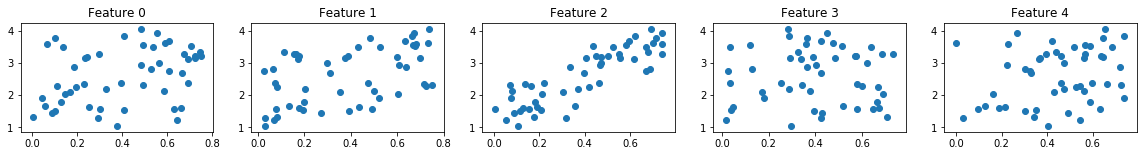

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.scatter(x_train[:,i],y_train);
    plt.title('Feature ' + str(i))

plt.show()
plt.close()

# Gradient boosting trees parameters
* max_depth is not very deep. Normal depth 1-5 normal. this is a regularization parameter
* n_estimators = 10 is a good start

## disadvantages
* not parallelizable 
* does not work well on high dimensional sparse data (like text)
* longer to train


In [192]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state= 0)

gbrt=GradientBoostingClassifier(random_state=0, max_depth=2,verbose=1)

gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train,y_train)) )
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test,y_test)) )

      Iter       Train Loss   Remaining Time 
         1           1.1668            0.28s
         2           1.0424            0.25s
         3           0.9391            0.23s
         4           0.8513            0.21s
         5           0.7781            0.20s
         6           0.7086            0.19s
         7           0.6500            0.18s
         8           0.5992            0.17s
         9           0.5533            0.16s
        10           0.5138            0.16s
        20           0.2744            0.11s
        30           0.1794            0.08s
        40           0.1253            0.07s
        50           0.0885            0.06s
        60           0.0654            0.04s
        70           0.0517            0.03s
        80           0.0421            0.02s
        90           0.0347            0.01s
       100           0.0289            0.00s
Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [191]:
GradientBoostingClassifier?

# model stacking
* we add the output of models as features to the original data set